<a href="https://colab.research.google.com/github/PauloPrudente/ciencia-de-dados/blob/master/A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
                       Date        Open        High         Low       Close  \
0 2021-10-07 00:00:00-04:00  138.863007  140.154449  138.563004  139.185501   
1 2021-10-08 00:00:00-04:00  139.906006  140.317001  139.429352  140.056000   
2 2021-10-11 00:00:00-04:00  139.800003  140.763657  138.806503  138.847504   
3 2021-10-12 00:00:00-04:00  139.637497  139.695007  136.250000  136.712997   
4 2021-10-13 00:00:00-04:00  137.750000  138.550003  136.976501  137.899994   

    Adj Close    Volume  
0  139.185501  18250000  
1  140.056000  18924000  
2  138.847504  16584000  
3  136.712997  22536000  
4  137.899994  16380000  


                       Date       Close
0 2021-10-07 00:00:00-04:00  139.185501
1 2021-10-08 00:00:00-04:00  140.056000
2 2021-10-11 00:00:00-04:00  138.847504
3 2021-10-12 00:00:00-04:00  136.712997
4 2021-10-13 00:00:00-04:00  137.899994


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -597.676
Method:                       css-mle   S.D. of innovations              2.630
Date:                Fri, 07 Oct 2022   AIC                           1213.352
Time:                        20:43:37   BIC                           1245.045
Sample:                             1   HQIC                          1226.107
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1785      0.027     -6.682      0.000      -0.231      -0.126
ar.L1.D.Close     0.0730      0.262      0.279      0.780      -0.440       0.586
ar.L2.D.Close     0.8110      0.236     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -583.125
Date:                            Fri, 07 Oct 2022   AIC                           1196.250
Time:                                    20:44:44   BIC                           1248.335
Sample:                                         0   HQIC                          1217.241
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1124      0.244     -0.460      0.646      -0.591       0.367
ar.L2          0.9496      0.226   

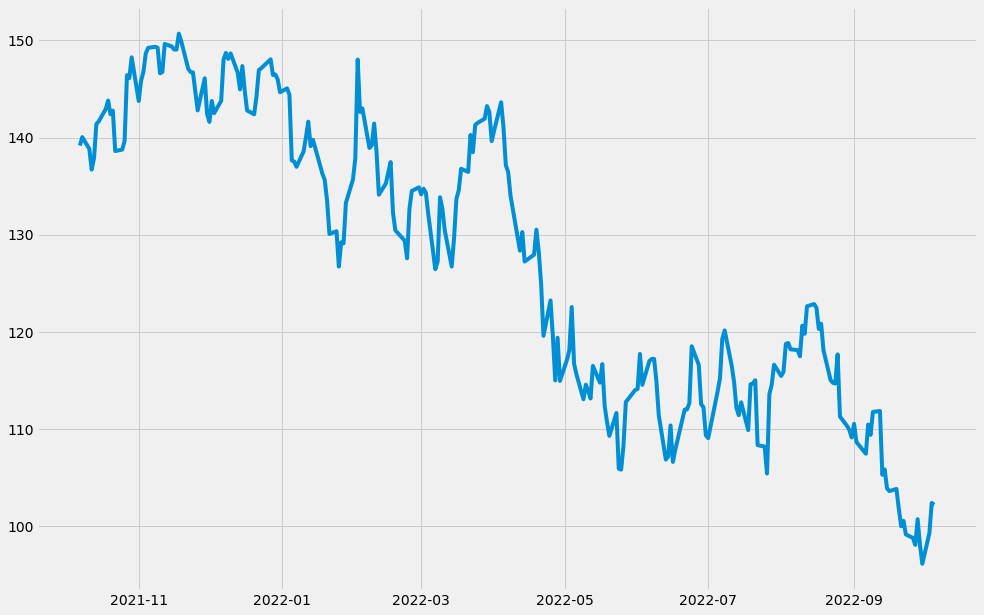

<Figure size 432x288 with 0 Axes>

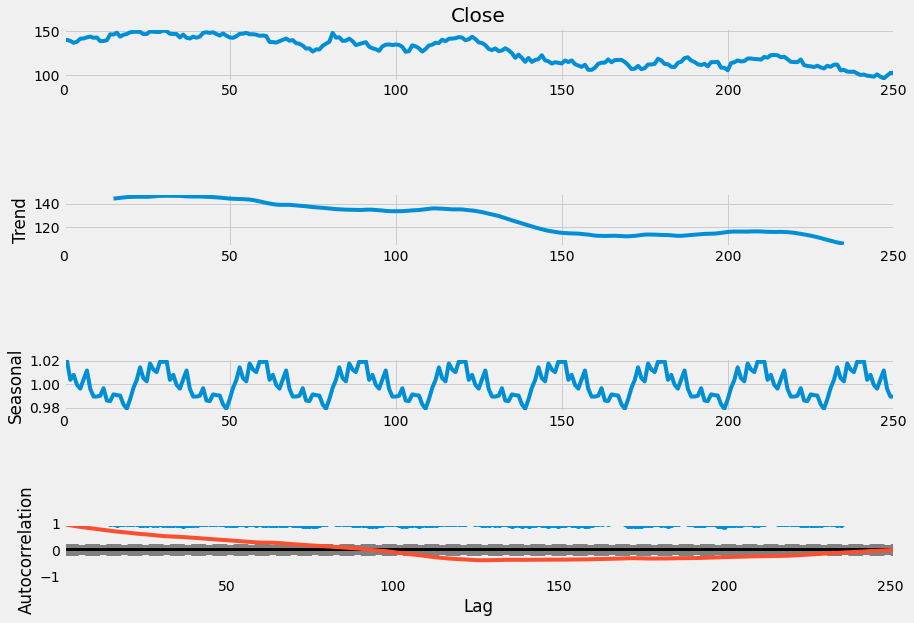

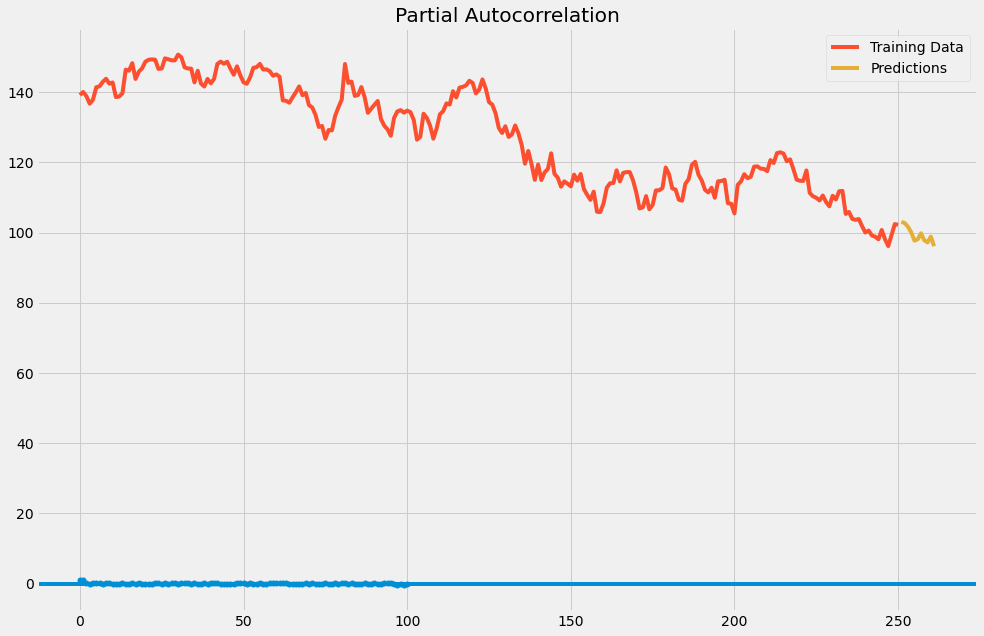

In [1]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

figure = px.bar(data, x = "Date", y= "Close")
figure.show()

figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

figure = px.scatter(data, x='Date', y='Close', range_x=['2021-07-12', '2022-07-11'],
                 title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"])
    ]
)
figure.show()

figure = px.scatter(data, x='Date', y='Close', range_x=['2021-07-12', '2022-07-11'],
                 title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"])
    ]
)
figure.show()


data = data[["Date", "Close"]]
print(data.head())

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

pd.plotting.autocorrelation_plot(data["Close"])

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

predictions = fitted.predict()
print(predictions)

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

predictions = model.predict(len(data), len(data)+10)
print(predictions)

data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

